In [ ]:
%%html
<link rel="stylesheet" href="static/hyrule.css" type="text/css">

# Matrix Algebra and the Regression Algorithm

Today we'll review how matrix algebra solves for the ordinary least squares regression, different cost functions for different linear solutions, and how we can use a linear solution to solve for probability of a given class.

## Objectives

* Understand how Matrix Algebra is used to find coefficients in an ordinary least squares regression
* Review two techniques to improving the linear model
* Understanding the use case and results of a Logistic Regression
* New Cross Validation Technique - **K-Fold**
* First Metric for Classification: **Accuracy**

## Code Dictionary

library | function | explanation
--------|----------|------------
`statsmodels` | `fit_regularlized` | Includes regularization while solving for the model
`sklearn.linear_model` | `LogisticRegression` | The logistic regression class in sklearn. It's built using the library [liblinear](http://www.csie.ntu.edu.tw/~cjlin/liblinear/)
`sklearn.cross_validation` | `KFold` | generates K train test splits given a data set; data is not reused the sets that return include the index values of a train and test set.

## Class Notes

### Matrix Algebra Review

In order to best understand most machine learning algorithms, we need some basis of linear algebra.

> Linear algebra is best defined as mathematics in the multidimensional space and the mapping between said spaces.

#### For Example

$$y = mx + b$$<br />
$$y = m_{1}x_{1} + m_{2}x_{2} + b$$<br />
$$y = m_{1}x_{1} + m_{2}x_{2} + m_{3}x_{3} + m_{4}x_{4} + b$$<br />
$$y = m_{1}x_{1} + m_{2}x_{2} + m_{3}x_{3} + m_{4}x_{4} + m_{5}x_{5} + m_{6}x_{6} + m_{7}x_{7} + m_{8}x_{8} + m_{9}x_{9} + m_{10}x_{10} + b$$

### Matrices

> Matrices are an array of real numbers with m rows and n columns

Each value in a matrix is called an entry.

$$\begin{bmatrix}1 & 5 & 8 & 7\\2 & 1 & 3 & 6\\3 & 5 & 1 & 0\\4 & 6 & 0 & 1\end{bmatrix}$$

$A_{2,1}$ in the given matrix, refers to the entry on the 2nd row, in the 1st column. The value is 2. 


### Vectors

> Vectors are a special kind of matrix, as they only consist of one dimension of real numbers.

These look most like a numeric array (or **list**) in Python.

$$\begin{bmatrix}1 & 3 & 9 & 2\end{bmatrix}$$

Likewise, you can refer to each index or value similarly (`a[0]` in Python is the same entity as 0 in vector a)


### Properties of Arrays

**Rule 1**: Matrices can be added together only when they are the same size. If they are not the same size, their sum is **undefined**.

$$\begin{bmatrix}1 & 3 & 9 & 2\end{bmatrix} + \begin{bmatrix}2 & 5 & 9 & 4\end{bmatrix} = 
\begin{bmatrix}3 & 8 & 18 & 6\end{bmatrix} $$

$$\begin{bmatrix}8 & 72 & 3 & 1\end{bmatrix} + \begin{bmatrix}17 & 55 & 3 & 10\end{bmatrix} = 
 \ ? $$
 
 
**Rule 2**: Matrices can be multiplied by a scalar (single entity) value.

> The result will always be the shape of the matrix.

$$\begin{bmatrix}1 & 3 & 9 & 2\end{bmatrix} \cdot 3 =
\begin{bmatrix}3 & 9 & 27 & 6\end{bmatrix} $$

$$\begin{bmatrix}8 & 72 & 3 & 1\end{bmatrix} \cdot 2 = \ ? $$


**Rule 3**: Matrices and vectors can be multiplied together given that the matrix columns are as wide as the vector is long. 

> The result will always be a vector.

$$\begin{bmatrix}1 & 3 & 9 & 2\\2 & 4 & 6 & 8\end{bmatrix} \begin{bmatrix}2 \\ 3 \\ 6 \\ 5  \end{bmatrix} = \begin{matrix} 2 + 9 + 54 + 10 \\ 4 + 12 + 36 + 40 \end{matrix} = \begin{bmatrix} 75 \\ 92 \end{bmatrix}$$

**Rule 4**: Matrices can be multiplied together using the same rules that we have from matrix-vector multiplication.

> The result will always be a matrix.

$$\begin{bmatrix}1 & 3 & 9 & 2\\2 & 4 & 6 & 8\end{bmatrix} \begin{bmatrix}2 & 1 \\ 3 & 2 \\ 6 & 0 \\ 5 & 4 \end{bmatrix} = \begin{matrix} 2 + 9 + 54 + 10 \\ 4 + 12 + 36 + 40 \\ 1 + 6 + 0 + 8 \\ 2 + 8 + 0 + 32\end{matrix} = \begin{bmatrix} 75 & 15 \\ 92 & 42 \end{bmatrix}$$


**Rule 5**: Solving for the inverse of a 2x2 matrix is equal to 1 over the determinant of A (scaler) times $\begin{bmatrix}d & -b\\-c & a\end{bmatrix}$

> The result will be the same shape as the original matrix

$$det(A) = ad - bc$$

$$\begin{bmatrix}1 & 3\\2 & 4\end{bmatrix}^{-1} = \frac{1}{1\cdot4 - 3\cdot2} \cdot \begin{bmatrix}4 & -3\\-2 & 1\end{bmatrix} = \begin{bmatrix}-2 & 1.5\\1 & -0.5\end{bmatrix}$$

### Why This Matters

Matrices represent the multiple dimensions in our data! If we had a vector that suggested how important each dimension of our data was, we could use that to find our best **linear model**.


### The Ordinary Least Squares (OLS) Linear Regression Formula

A regression model is a functional relationship between input & response
variables.

The **simple linear regression** model captures a linear relationship between a single input variable x and a response variable y: 

$$y = α+βx+ε$$

* $y$ = response variable (the one we want to predict)
* $x$ = input variable (the one we use to train the model)
* $α$ = intercept (where the line crosses the y-axis)
* $β$ = regression coefficient (the model “parameter”)
* $ε$ = residual (the prediction error)

The **cost function** or goal of the ordinary least squares regression is to find the linear solution with the least sum of square error.

#### Solving for OLS

We'll break down the math here:

The OLS Linear Regression is just matrix algebra (the stuff from up above!)

Let’s go over the math by hand so we can understand how we determine the regression coefficient.

A linear regression in its simplest form:

$y = \alpha + \beta x + \epsilon$

but we can assume that our $\alpha$ (y-itercept)is either 0 or 1, and $\epsilon$ (error) is zero.

$y = βx$

but we want to solve for β, which means our new equation now looks like this:

$β = ( X^TX)^{-1} X^Ty$


#### How did we get there?

The below is problematic, as we cannot divide by a matrix! So we first square the matrix.

$β = \frac{y}x == \frac{xy}{x^2}$

Recall in algebra:

$\frac{1}x = x^{-1}$

Inverting the matrix since raising $x$ to the power of negative 1 is equal to $1$ over $x$

$\frac{1}{x{^2}} \cdot \frac{xy}1$

$(XX)^{-1}XY$

And finally to make it programmer friendly:

$β = (X^TX)^{-1} X^TY$

#### Example

So if we had data:

    Input  Output
    3.385  44.5
    0.48   15.5
    1.35   8.1
    465    423
    36.33  119.5

$$β=\left(
    \begin{array}{r}
         \begin{matrix}
             1 & 1 & 1 & 1 & 1 & \\
             3.385 & 0.48 & 1.35 & 465 & 36.33
         \end{matrix}
         \begin{matrix}
            1 & 3.385 & \\
            1 & 0.48 & \\
            1 & 1.35 & \\
            1 & 465 & \\
            1 & 36.33
         \end{matrix}
    \end{array}
  \right)^{-1}
  \cdots
$$
  
$$β = ( X^TX)^{-1} \cdots$$

$$\cdots
    \left(
    \begin{array}{r}
         \begin{matrix}
             1 & 1 & 1 & 1 & 1 & \\
             3.385 & 0.48 & 1.35 & 465 & 36.33
         \end{matrix}
         \begin{matrix}
            44.5 & \\
            15.5 & \\
            8.1 & \\
            423 & \\
            119.5
         \end{matrix}
    \end{array}
  \right)
$$
  
$$ \cdots X^TY$$

$$β=\begin{array}{r}
         \begin{bmatrix}
            0.2617 & -0.0006 & \\
            -0.0006 & 0.000006
         \end{bmatrix}
         \begin{bmatrix}
            610.6 & \\
            201205.4425
         \end{bmatrix}
    \end{array}
$$

$$β = ( X^TX)^{-1} X^TY$$

$$ \begin{bmatrix}
            37.2 & \\
            0.838
         \end{bmatrix}
    = \begin{array}{r}
         \begin{bmatrix}
            0.2617 & -0.0006 & \\
            -0.0006 & 0.000006
         \end{bmatrix}
         \begin{bmatrix}
            610.6 & \\
            201205.4425
         \end{bmatrix}
    \end{array}
$$

$$β = ( X^TX)^{-1} X^TY$$

<div style='text-align: center;'>(with some rounding...)</div>

$$ \begin{array}{c}
            Intercept : 37.2 & \\
            β : 0.838
         \end{array}
$$

#### Evaluate and verify in Python

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm

practice_set = pd.DataFrame({
    'x': [3.385, 0.48, 1.35, 465, 36.33],
    'y': [44.5, 15.5, 8.1, 423, 119.5],
})

A = np.array([[1, 1, 1, 1, 1], practice_set['x']])
print np.linalg.inv(A.dot(A.T)).dot(A.dot(practice_set['y']))

model = lm.LinearRegression().fit(practice_set[['x']], practice_set['y'])
print model.intercept_
print model.coef_

[ 37.20089608   0.83821876]
37.2008960793
[ 0.83821876]


### Other cost techniques: Regularization

Often times we do **not** want to solve with the OLS regression, because it may be accounting for *bias* in the data set, and not necessarily the *variance* within the data:

* **Bias** refers to predictions that are systematically
inaccurate. 
* **Variance** refers to predictions that are generally
inaccurate.

<img src='img/darts.jpg' style='float: left; height: 300px;' />
<img src='img/biasvariance.png' style='float: left;  height: 300px;' />

1. [http://www.kdnuggets.com/2012/09/pedro-domingos-useful-things-about-machine-learning.html](http://www.kdnuggets.com/2012/09/pedro-domingos-useful-things-about-machine-learning.html)
2. [http://scott.fortmann-roe.com/docs/BiasVariance.html](http://scott.fortmann-roe.com/docs/BiasVariance.html)

Therefore, it may make sense to adjust the cost function of our regression to trade fitting to the bias of the data set, so we may have a **less accurate model**, but a **better general, more applicable model**. Recall: our goal is not to find the best fit, but to find the fit that best explains the variance in our data.

We define these with two **regularization** techniques:

#### L1 regularization: Used when we have small data but many features.

* minimize this: $ min(\lVert y - xβ \rVert^2 + λ\lVert x \rVert)$
* sklearn's math: $ min(\lVert Xw - y \rVert^2 + \alpha\lVert w \rVert)$
* solution: $y=Σβ_ix_i + ε \quad st. \quad Σ \lVert β_i \rVert \lt λ$
    
#### L2 regularization: Used in just about all other cases.
* minimize this: $ min(\lVert y - xβ \rVert^2 + λ\lVert x \rVert^2)$
* sklearn's math: $ min(\lVert Xw - y \rVert^2 + \alpha\lVert w \rVert^2)$
* solution: $y=Σβ_ix_i + ε \quad st. \quad Σ \lVert β_i^2 \rVert \lt λ$


#### What this looks like in our code: exploring other regressions in sklearn

The linear_model module in sklearn is actually for regularized regressions. Each that include a regulization technique include a hyperparameter `alpha` to set--this would be the $\lambda$ from above. A quick comparison:

regression | class | L1? | L2?
-----------|-------|:-------------:|:------------:
Ordinary Least Squares | `LinearRegression()` | - | -
Ridge Regression | `Ridge()` | - | $\checkmark$ 
Lasso Regression | `Lasso()` | $\checkmark$ | - 
Elastic Net | `ElasticNet()` | $\checkmark$ | $\checkmark$ 

### Try it: Fitting different models

Start with the following base model, generated from a previous class:

```python
from sklearn import linear_model as lm
from sklearn.datasets import load_boston

boston = load_boston()
desc = boston.DESCR
bostondf = pd.DataFrame(boston.data, columns=boston.feature_names)
y_col = 'MEDV'
bostondf[y_col] = boston.target
x_cols = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
]

model = lm.LinearRegression().fit(bostondf[x_cols], bostondf[y_col])
```

Small groups will work on only **one** of the following questions (do as assigned)

1. Using one of the `Ridge()`, `Lasso()`, or `ElasticNet()` classes, write a for loop around that inserts a value for alpha, fits the model, and stores the Mean Square Error (Mean Square Error is in the metrics module of sklearn). Plot a line chart where x is the alpha parameter and y is the mean squared error. What does the line chart look like? (Use alphas between 0.1 and 0.000000000001)
2. Using one of the `Ridge()`, `Lasso()`, or `ElasticNet()` classes, write a for loop around that inserts a value for alpha, fits the model, and stores the `predict()` results from the model into a DataFrame. Plot a line chart where x is the one of the X columns and y is the predicted value. What does the line chart look like? (Use alphas between 0.1 and 0.000000000001)
3. Using each Regression class (all four from the above table), run a test train split, calculate the difference in $R^2$ between the test and train, and plot each result (x labels being the regression used, y being the difference in $R^2$ between test and train) Use the default alpha parameter. Which regression had the the most consistent result?


### Logistic Regression

#### Logistic function

Logistic Regression is an implementation of the linear regression often used to solve a **binary** problem (though it can be used to do others). What sets it apart from linear discriminant models (say, a line that separates two classes) is that it provides _probabilities_ of a given class, as opposed to assigning a class. Since most classification problems are binary, the results are interpretive, much like a linear regression.

Class probability is generally represented in a space of $0$ to $inf$. To use a linear model to determine probality of a given class, we want to use a function that gives us results from $-inf$ to $inf$. Therefore, to get to this mode, we use log, and work with log odds.

One challenge is that linear models (OLS, logistic, etc) often expect some type of normal distribution. 

#### Advantages of the Logistic Regression
* Interpretable (coefficients; weights)
* Parameters are few : increase linearly with dimensionality
* Extensible to multi-class

#### Equation
 $P(Y=1) = \dfrac{e^{(\alpha + \beta x)}}{1 + e^{(\alpha + \beta x)}}$

#### Coefficient Estimation: Maximum Likelihood Estimation
* Which values of the coefficients make the observed data most likely to have occurred?
* Take the Beta and raise $10^\beta$ for odds ratio

#### Odds, Log-odds

The coefficients of the logistic regression represent the log-odds of the target given that feature. We'll need to use the `exp()` function to transform them into more human readable odds ratios.

<img src='img/bernoulli.png' />

In [ ]:
### Statsmodels, because we love statsmodels,
### and because logistic regressions are still common for data exploration:from sklearn import datasets.
### Since logistic is used to solve binomial problems, our targets should be 0 and 1.
### by default, fit_regularized uses L1 Regularization
from sklearn import datasets
import numpy as np
import statsmodels.formula.api as smf
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=['sep_len', 'sep_wid', 'pet_len', 'pet_wid'])
irisdf['target'] = iris.target
irisdf = irisdf.query('target in (1, 2)')
irisdf['target'] = irisdf['target'] - 1

lmf = smf.logit('target ~ sep_wid + pet_wid', irisdf)
# setting alpha to 0 effectively removes the hyperparameter
results = lmf.fit_regularized(alpha=0)
print results.summary()
print np.exp(results.params)

# sklearn implementation
# note that by default, LogisticRegression() uses L2 Regularization.
# C, in this case, is the alpha parameter
# we can't remove it (it's a fickle sklearn library issue), but we can make is huge so it as less of an effect.
clf = lm.LogisticRegression(C=1e100).fit(irisdf[['sep_wid', 'pet_wid']], irisdf['target'])
#print clf.coef_
#print np.exp(clf.coef_)
# same model, different regularization method
clf2 = lm.LogisticRegression(penalty='l1', C=1e100).fit(irisdf[['sep_wid', 'pet_wid']], irisdf['target'])
#print clf2.coef_
#print np.exp(clf2.coef_)

### Cross Validation: k-fold

k-fold is splitting the dataset up evenly into a test and train split $k$ times. We want to determine:

* do the cuts generally looks the same when generating a model?
* should we consider the best model, or the average of k fits?

sklearns implementation allows you to randomize before splitting the data. Consider the results here to be a *conservative* appoach to a data problem.

### Metrics: Accuracy

Accuracy measure number correctly predicted over total number of observations.

In [2]:
import sklearn.cross_validation

kf = sklearn.cross_validation.KFold(n=len(irisdf), n_folds=3, shuffle=True, random_state=1234)

for train, test in kf:
    clf3 = lm.LogisticRegression(penalty='l1', C=1e100).fit(irisdf.iloc[train][['sep_wid', 'pet_wid']], irisdf.iloc[train]['target'])
    # Score for most classifiers by default returns accuracy.
    print clf3.coef_, clf3.score(irisdf.iloc[test][['sep_wid', 'pet_wid']], irisdf.iloc[test]['target'])

/Users/joshleeman/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'irisdf' is not defined

## On Your Own

1. Import the affair data in the file "affair_dataframe.pkl". Use `pd.read_pickle(string)` to import it.
2. Explore the data available around affairs, determining what seems to more related or correlated to "affair"
3. Create a logistic model that explains how variables predict the target variable "affair." Remember to use a cross validation technique!
4. **\*** practice the regularization methods. Given a test train split, at what point do you get a good model? Evaluate using accuracy.
5. **\*\*** How do results change when using k-fold? How would you go about finding the best value k for k-fold?
6. **\*\*** Compare your results with the model found in "affairs.pkl" (load using `import pickle; model = pickle.load(open(filename))`)

In [12]:
affair = pd.read_pickle('../data/affair_dataframe.pkl')

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
affair = pd.read_pickle('../data/affair_dataframe.pkl')

affair.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
affair_df = pd.DataFrame(affair)

affair_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [19]:
affair_df['affair_binary'] = (affair_df['affair'] > 0)
affair_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair,affair_binary
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1,True
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1,True
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1,True
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1,True
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1,True


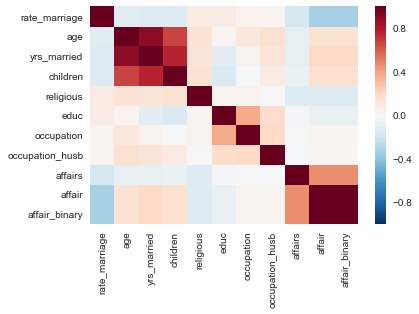

In [20]:
sns.heatmap(affair_df.corr())

In [22]:
affair_df.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair,affair_binary
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068,-0.331776,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964,0.146519,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737,0.203109,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278,0.159833,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.129299,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740,-0.075280,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469,0.028981,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614,0.017637,0.017637
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000,0.464046,0.464046
affair,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,0.464046,1.000000,1.000000


In [ ]:
X = affair_df

## Review, Practice, Next Steps

#### Mathematics
* [Great review on Linear Algebra](http://cs229.stanford.edu/section/cs229-linalg.pdf)
* [Deck on Regularization](http://www.mit.edu/~9.520/spring07/Classes/rlsslides.pdf)
* [Tuning the alpha hyperparameter](http://en.wikipedia.org/wiki/Hyperparameter_optimization)

#### Machine Learning
[Early learning on its application to linear models](http://dept.stat.lsa.umich.edu/~kshedden/Courses/Stat401/Notes/401-multreg.pdf)

#### Code
[A Matrix Class implemented in pure python](http://code.activestate.com/recipes/189971-basic-linear-algebra-matrix/)

#### Logistic Regression
* For more on logistic regression, watch the [first three videos](https://www.youtube.com/playlist?list=PL5-da3qGB5IC4vaDba5ClatUmFppXLAhE) (30 minutes total) from Chapter 4 of An Introduction to Statistical Learning.
* UCLA's IDRE has a handy table to help you remember the [relationship between probability, odds, and log-odds](http://www.ats.ucla.edu/stat/mult_pkg/faq/general/odds_ratio.htm).
* Better Explained has a very friendly introduction (with lots of examples) to the [intuition behind "e"](http://betterexplained.com/articles/an-intuitive-guide-to-exponential-functions-e/).
* Here are some useful lecture notes on [interpreting logistic regression coefficients](http://www.unm.edu/~schrader/biostat/bio2/Spr06/lec11.pdf).
* yhat has a great tutorial on logistic regression using [statsmodels](http://blog.yhathq.com/posts/logistic-regression-and-python.html)